<a href="https://colab.research.google.com/github/Khomiakov7706/SKAB/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

Matplotlib - это библиотека, предназначенная для визуализации на Python. Позволяет осуществлять статическую, анимированную и интерактивную визуализацию. 

В процессе обучения будут изучены:

*	Простейшие инструменты визуализации:
    *	график;
    *	диаграмма;
    *	гистограмма;
    *	контуры с заливкой. 
*	Необходимые инструменты для пояснения графиков:
    *	обозначения осей;
    *	легенда;
    *	прочие сопровождающие рисунок элементы.
*	Работа с наборами рисунков. 
*	Сохранение графиков
*	Онлайн отображение картинок
*	Смена стилей визуализации 

Полезные ссылки:
* https://matplotlib.org/stable/gallery/index.html
* https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Загрузка библиотек:

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

## Простейшие возможности

Изобразим последовательность со следующими координатами x = [0,1,2,3,4],  y = [1,2,3,4,5] соответственно:

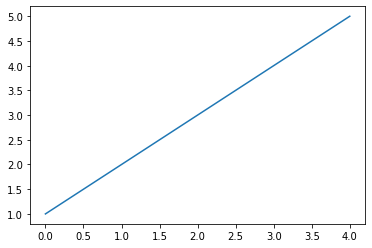

In [ ]:
y = [1,2,3,4,5]
plt.plot(y)

Как видно из рисунка, базово, ось абцисс начинается с 0 и заканчивается числом len(y)-1.

Подробнее про аргументы plt.plot можно почитать [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Стоит также обратить внимание, при наличии nan линия обрывается:

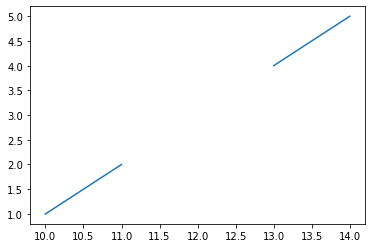

In [ ]:
y = [1,2,np.nan,4,5]
x = [10,11,12,13,14]
plt.plot(x,y)

Существует возможнсть отмечать имеющиеся координаты точками, а не рисовать их линиями. Другой возможностью явялется регулировка цвета с помощью аргумента "c" или "color":

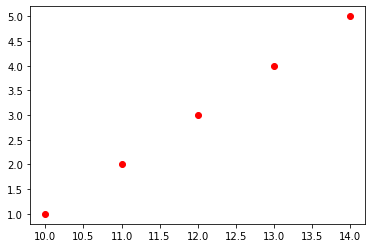

In [ ]:
y = [1,2,3,4,5]
x = [10,11,12,13,14]
plt.plot(x,y,'o',c='r') #

Существует возможность на одном рисунке рисовать сразу несколько графиков. Способ 1: 

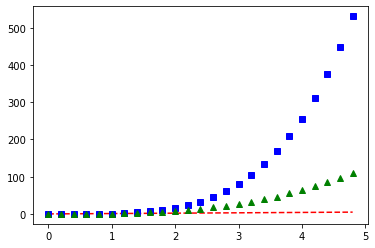

In [ ]:
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
plt.plot(x, y1, 'r--')
plt.plot(x, y2**2, 'bs')
plt.plot(x, y3, 'g^')

Способ 2:

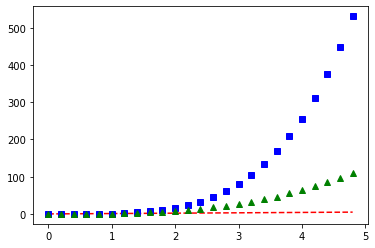

In [ ]:
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
plt.plot(x, y1, 'r--', x, y2**2, 'bs', x, y3, 'g^')

plt.figure() команда, обозначающая начало нового рисунка. Если ее выполнить, то наполнение предыдущего рисунка закончится и начется наполнение нового, например с помощью plt.plot().

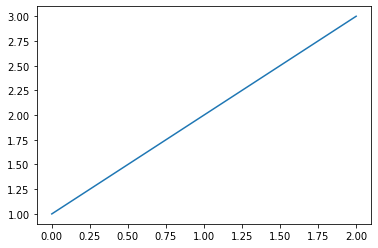

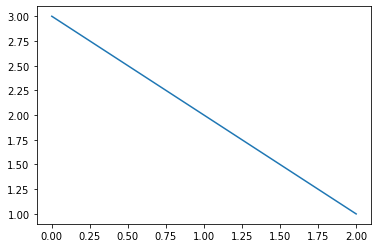

In [ ]:
plt.figure()
plt.plot([1,2,3])
plt.figure()
plt.plot([3,2,1])

plt.show() - также важная команда, благодаря ей, вы сможете отрисовывать рисунки в онлайн. Например, прежде чем нарисовать 1 рисунок вам нужно 10 секунд расчетов, а всего нужно 5 рисунков. Без plt.show вам придется ждать 50 сек, в то время как с ним, графики будет отрисовываться по мере вычислений или каждые 10 секунд:

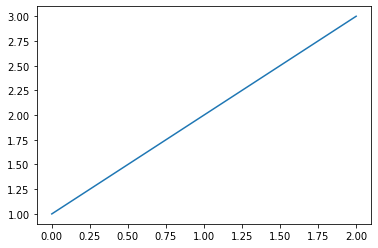

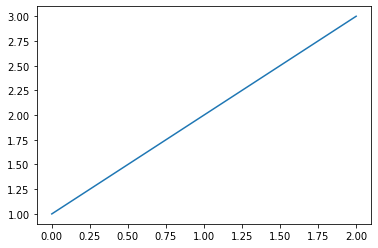

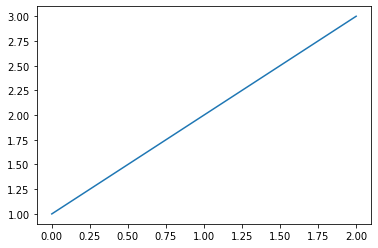

In [ ]:
import time
for i in range(3):
    time.sleep(2)
    plt.figure()
    plt.plot([1,2,3])
    plt.show() #!!! Попробуйте закоментировать эту запись. 

Чтобы появился рисунок со столбчатой диаграммой необходимо выполнить следующее:

<BarContainer object of 3 artists>

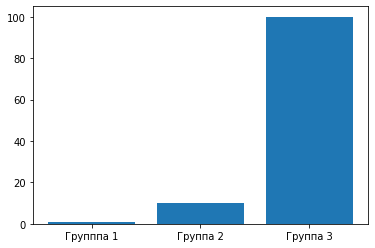

In [ ]:
names = ['Групппа 1', 'Группа 2', 'Группа 3']
values = [1, 10, 100]

plt.bar(names, values)

Чтобы отрисовать 2 различных класса, например, мужчины и женщины для каждой группы, нужно выполнить следующее:

<BarContainer object of 3 artists>

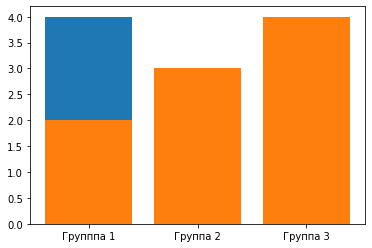

In [ ]:
names = ['Групппа 1', 'Группа 2', 'Группа 3']
men = [4, 3, 2]
women = [2,3,4]

plt.bar(names, men)
plt.bar(names, women)

Стоит обратить внимание, что столбцы разных классов пререкаются, что иногда плохо для визуализации. В таком случае, столбцы можно разметить рядом друг с другом, благодаря следующим свойствам функции plt.bar:

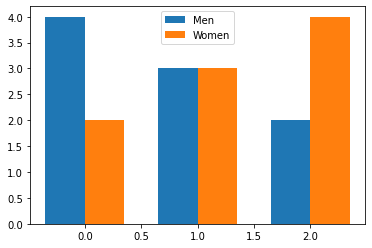

In [ ]:
names = ['Групппа 1', 'Группа 2', 'Группа 3']
men = [4, 3, 2]
women = [2,3,4]

x = np.arange(len(women)) # ось абцисс
width = 0.35 # ширина столбца

plt.bar(x - width/2, men, width, label='Men')
plt.bar(x + width/2, women, width, label='Women')

plt.legend()

Или разместить их друг над другом. В этом случае можно даже оценить сумму велечин.  

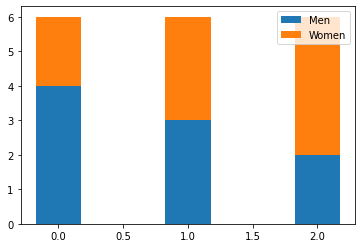

In [ ]:
names = ['Групппа 1', 'Группа 2', 'Группа 3']
men = [4, 3, 2]
women = [2,3,4]

x = np.arange(len(women))
width = 0.35

fig, ax = plt.subplots()

p1 = ax.bar(x, men, width, label='Men')
p2 = ax.bar(x, women, width,bottom=men, label='Women')
plt.legend()

plt.scatter - диаграмма рассеяния:

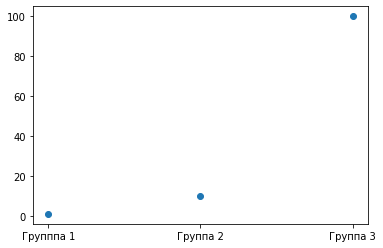

In [ ]:
names = ['Групппа 1', 'Группа 2', 'Группа 3']
values = [1, 10, 100]

plt.scatter(names, values)

В случае, когда нам необходимо построить распределение велечины, мы можем воспользоваться функцией plt.hist

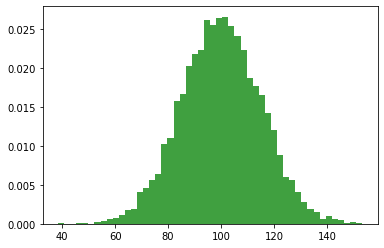

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

n, bins, patches = plt.hist(x, 
                            bins=50, # количество столбцов или детализация
                            density=1, # нормировка
                            facecolor='g', # цвет
                            alpha=0.75 # прозрачность цвета
                           )

Если нужен контур с заливкой то:

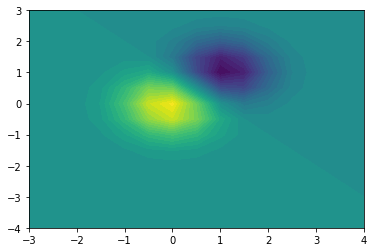

In [ ]:
delta = 0.5
x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = Z1 - Z2

plt.contourf( X, Y, Z, 40)


## Поясняющие записи графиков

![image.png](attachment:image.png)

Рисунок, поясняющий необходимые элементы описания графиков, взятый из [Tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

Прорисуем 3 графика на одном рисунке:

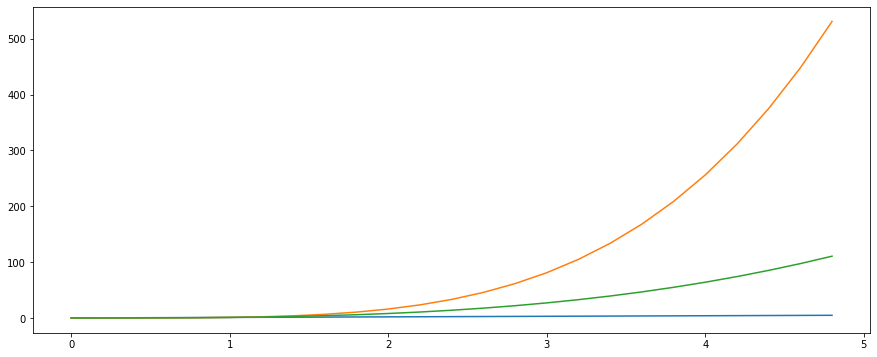

In [ ]:
plt.figure(figsize=(15,6))
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
plt.plot(x, y1)
plt.plot(x, y2**2)
plt.plot(x, y3)
plt.show()

Давать обозначения для рисунков: названия осей, названия графиков нужно делать желательно всегда, так как этого часто требуют ГОСТы и банальное удобство как для сторонних обозревателей, так и для вас самих, после того как вы не пользовались этим длительное время. Дадим нашим графикам больше информации:

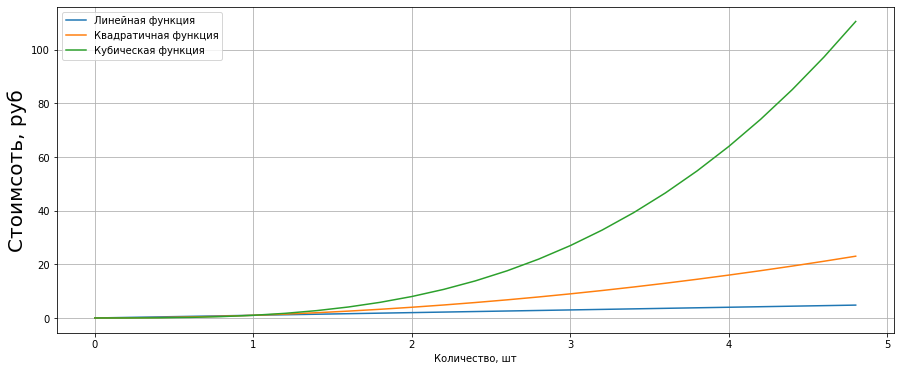

In [ ]:
plt.figure(figsize=(15,6))
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
plt.plot(x, y1,label='Линейная функция')
plt.plot(x, y2,label='Квадратичная функция')
plt.plot(x, y3,label='Кубическая функция')
plt.xlabel('Количество, шт')
plt.ylabel('Стоимсоть, руб',size=20)

plt.legend()
plt.grid()
plt.show()

Иногда полезно давать дополнительные обозначения. Например, показывать контрольные пределы или выделять область графиков (например разделение на тренировочную и тестовые выборки)

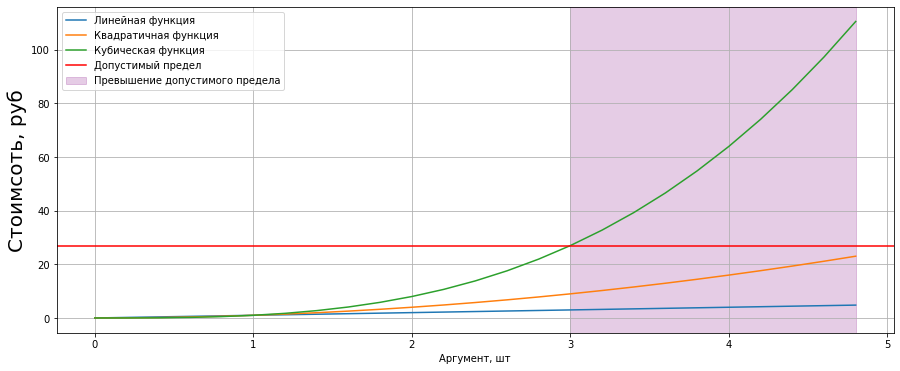

In [ ]:
plt.figure(figsize=(15,6))
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
plt.plot(x, y1,label='Линейная функция')
plt.plot(x, y2,label='Квадратичная функция')
plt.plot(x, y3,label='Кубическая функция')
plt.xlabel('Аргумент, шт')
plt.ylabel('Стоимсоть, руб',size=20)

plt.axhline(27,c='r',label='Допустимый предел')
plt.axvspan(3,4.8,color='purple',alpha=0.2,label='Превышение допустимого предела')


plt.legend()
plt.grid()
plt.show()

Если необходимо заполнить рисунок сложным образом, то на помощь может прийти plt.fill:

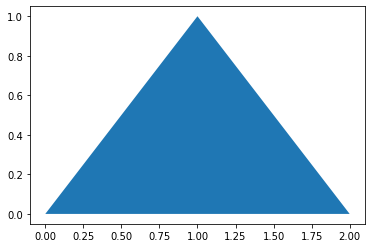

In [ ]:
plt.fill("time", "signal", data={"time": [0, 1, 2], "signal": [0, 1, 0]})

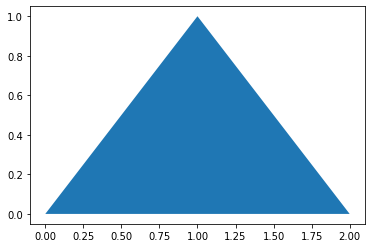

In [ ]:
plt.fill([0, 1, 2],[0, 1, 0])


## Несколько элементов на одном изображении

Чтобы системно разместить несколько рисунков на одном большом рисунке, пригодится add_subplot:

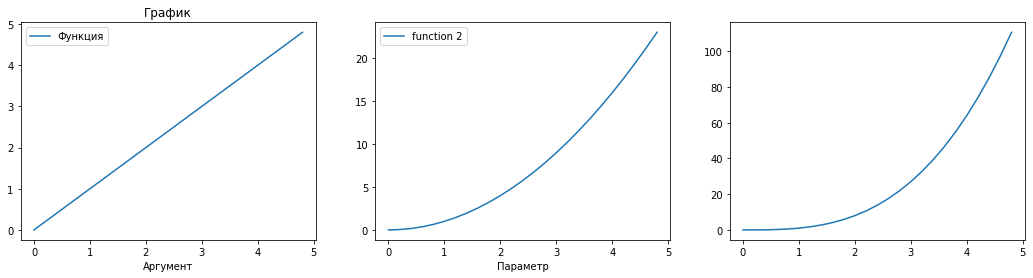

In [ ]:
f = plt.figure(figsize=(18,4))
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3
ax1 = f.add_subplot(131) # 131 это 1,3,1 это 1- сколько всего строк, 3 -сколько стоблцов, 1- порядковый номер графика
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax1.plot(x,y1,label='Функция')
ax1.legend()
ax1.set_xlabel('Аргумент')
ax1.set_title('График')
ax2.plot(x,y2, label='function 2')
ax2.legend()
ax2.set_xlabel('Параметр')
ax3.plot(x,y3)


plt.show()

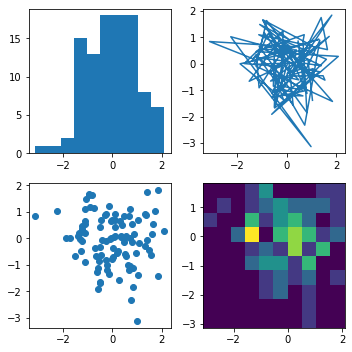

In [ ]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])
plt.tight_layout()
plt.show()

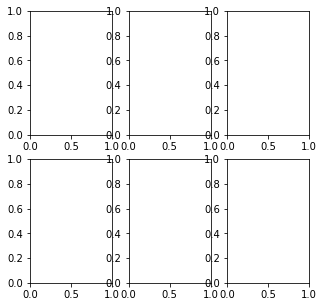

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(5, 5))

При работе с subplot иногда возникают проблемы, связанные с пересечением графиков. В этих случаях поможет **plt.tight_layout()**. В примере ниже как раз такая проблема. Чтобы избавится от нее просто раскомментируйте последнюю строчку. В этом примере также несколько иначе инициализированы subplots.

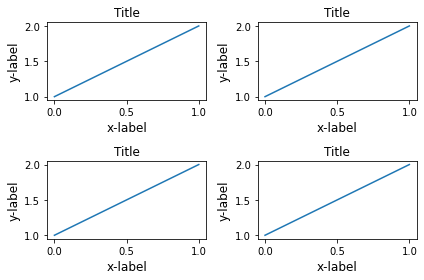

In [ ]:
def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

## О другом


1. Сохранение
2. Онлайн вывод картинок
3. Смена стилей

### Сохранение рисунка

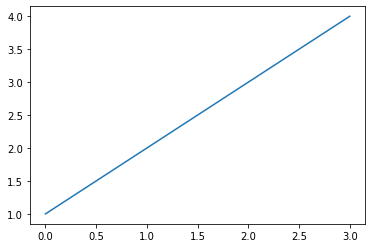

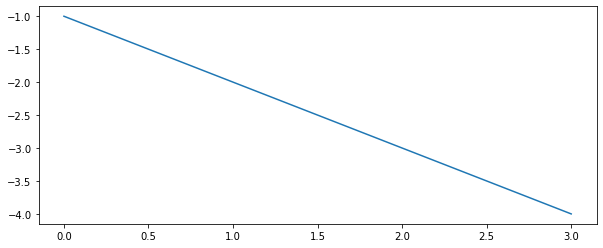

In [ ]:
list1 = [ 1, 2, 3, 4]
list2 = [-1,-2,-3,-4]
plt.plot(list1)
plt.savefig('./figure.png') # должен быть до создания нового рисунка
plt.show()
plt.figure(figsize=(10,4))
plt.plot(list2)
plt.show()

### Онлайн вывод картинок

In [ ]:
from IPython import display
import time 

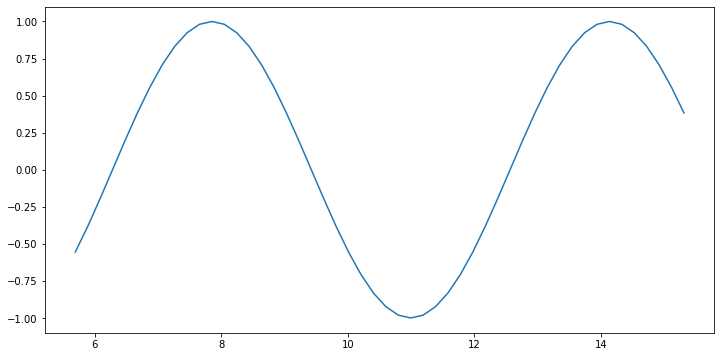

In [ ]:
x = np.arange(-np.pi*5,np.pi*5,np.pi/16)
y = np.sin(x)

window=50
for t in range(len(x)-window):
    display.clear_output(wait=True)
    plt.figure(figsize=(12,6))
    plt.plot(x[t:t+window],y[t:t+window])
    plt.show()
    time.sleep(0.02)


### Смена стилей

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


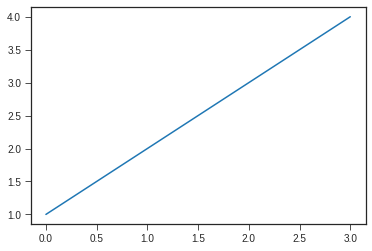

In [ ]:
print(plt.style.available)
plt.style.use('seaborn-ticks')
plt.plot([1,2,3,4])